In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

# File path to your Excel file
file_path = r"C:\Users\mohammed ansar ur ra\.ipynb files\Project_Data.xlsx"

# Attempting to read Excel without specifying engine
try:
    shift1 = pd.read_excel(file_path, sheet_name="Shift1")
    shift2 = pd.read_excel(file_path, sheet_name="Shift2")
    shift3 = pd.read_excel(file_path, sheet_name="Shift3")
    print("Data loaded successfully!")
except ImportError as e:
    print("An error occurred. Make sure the necessary libraries are installed.")
    print(e)
except FileNotFoundError:
    print(f"File not found at the path: {file_path}")


Data loaded successfully!


In [3]:
shift1['Date'] = pd.to_datetime(shift1['Date'])
shift2['Date'] = pd.to_datetime(shift2['Date'])
shift3['Date'] = pd.to_datetime(shift3['Date'])

shift1['Month'] = shift1['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift1['Month_num'] = shift1['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift1['Month_new'] = shift1[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift2['Month'] = shift2['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift2['Month_num'] = shift2['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift2['Month_new'] = shift2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift3['Month'] = shift3['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift3['Month_num'] = shift3['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift3['Month_new'] = shift3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [4]:
shift1['Financial_Year'] = np.where((shift1['Date'] >= '2013-04-01') & (shift1['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift1['Date'] >= '2015-04-01') & (shift1['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift2['Financial_Year'] = np.where((shift2['Date'] >= '2013-04-01') & (shift2['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift2['Date'] >= '2015-04-01') & (shift2['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift3['Financial_Year'] = np.where((shift3['Date'] >= '2013-04-01') & (shift3['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift3['Date'] >= '2015-04-01') & (shift3['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

In [5]:
shift1['Shift'] = 'Shift1'
shift2['Shift'] = 'Shift2'
shift3['Shift'] = 'Shift3'

data1 = pd.concat([shift1,shift2,shift3])
data1['Date'] = pd.to_datetime(data1['Date'])

In [6]:
total = pd.pivot_table(data1,index='Date',values = ['Working Hour', 'Idle Hour', 'Maintenace Hour','Break down hours', 'Total Hours', 'Production'],aggfunc='sum').reset_index()
total['Date'] = pd.to_datetime(total['Date'])

total['Financial_Year'] = np.where((total['Date'] >= '2013-04-01') & (total['Date'] <= '2014-03-31'),'2013_2014',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
        np.where((total['Date'] >= '2015-04-01') & (total['Date'] <= '2016-03-31'),'2015_2016','Blank'))))
total.index = total['Date']
total = total.drop(columns = 'Date')

In [7]:
#Zero production days
total = total.reset_index()
total[total['Production'] == 0].reset_index(drop=True)

,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
0,2014-03-26,19.0,3.0,2.0,0,24,0.0,2013_2014
1,2014-04-18,19.0,3.0,2.0,0,24,0.0,2014_2015
2,2015-06-01,19.0,3.0,2.0,0,24,0.0,2015_2016
3,2015-06-22,19.0,3.0,2.0,0,24,0.0,2015_2016


In [8]:
zero_production = pd.merge(total[total['Production'] == 0].reset_index(drop=True),data1[['Date','Breakdown_Reason']].drop_duplicates(),on = 'Date',how='left').drop_duplicates()
pd.pivot_table(zero_production[['Date','Breakdown_Reason','Production']],index='Date',columns = 'Breakdown_Reason',aggfunc=lambda x: len(x.unique()))

Production    
Breakdown_Reason      EBD11 RF1
Date                           
2014-03-26                1   1
2014-04-18                1   1
2015-06-01                1   1
2015-06-22                1   1

In [9]:
total.groupby('Financial_Year')['Production'].mean().reset_index()

,Financial_Year,Production
0,2013_2014,10528.219178
1,2014_2015,10596.164384
2,2015_2016,10582.513661


In [10]:
total[(total['Production'] == 0)]

,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
359,2014-03-26,19.0,3.0,2.0,0,24,0.0,2013_2014
382,2014-04-18,19.0,3.0,2.0,0,24,0.0,2014_2015
791,2015-06-01,19.0,3.0,2.0,0,24,0.0,2015_2016
812,2015-06-22,19.0,3.0,2.0,0,24,0.0,2015_2016


In [11]:
total.loc[359,['Production']] = 10528.219178
total.loc[382,['Production']] = 10596.164384
total.loc[[791,812],['Production']] = 10582.513661
total.iloc[[359,382,791,812],:]

C:\Users\mohammed ansar ur ra\AppData\Local\Temp\ipykernel_23148\2230486760.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10528.219178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total.loc[359,['Production']] = 10528.219178


,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
359,2014-03-26,19.0,3.0,2.0,10528.219178,24,0.0,2013_2014
382,2014-04-18,19.0,3.0,2.0,10596.164384,24,0.0,2014_2015
791,2015-06-01,19.0,3.0,2.0,10582.513661,24,0.0,2015_2016
812,2015-06-22,19.0,3.0,2.0,10582.513661,24,0.0,2015_2016


In [12]:
from math import sqrt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pmdarima as pm
import statsmodels as sm
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = total.copy()
df.index = df['Date']
del df['Date']
df.head()

,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
Date,,,,,,,
2013-04-01,3.0,3.0,1.5,13200.0,24,16.5,2013_2014
2013-04-02,6.0,4.0,2.0,9600.0,24,12.0,2013_2014
2013-04-03,11.0,3.0,3.0,5600.0,24,7.0,2013_2014
2013-04-04,4.0,3.0,2.5,11600.0,24,14.5,2013_2014
2013-04-05,5.0,3.0,1.5,11600.0,24,14.5,2013_2014


# Trend

<Figure size 4000x1600 with 0 Axes>

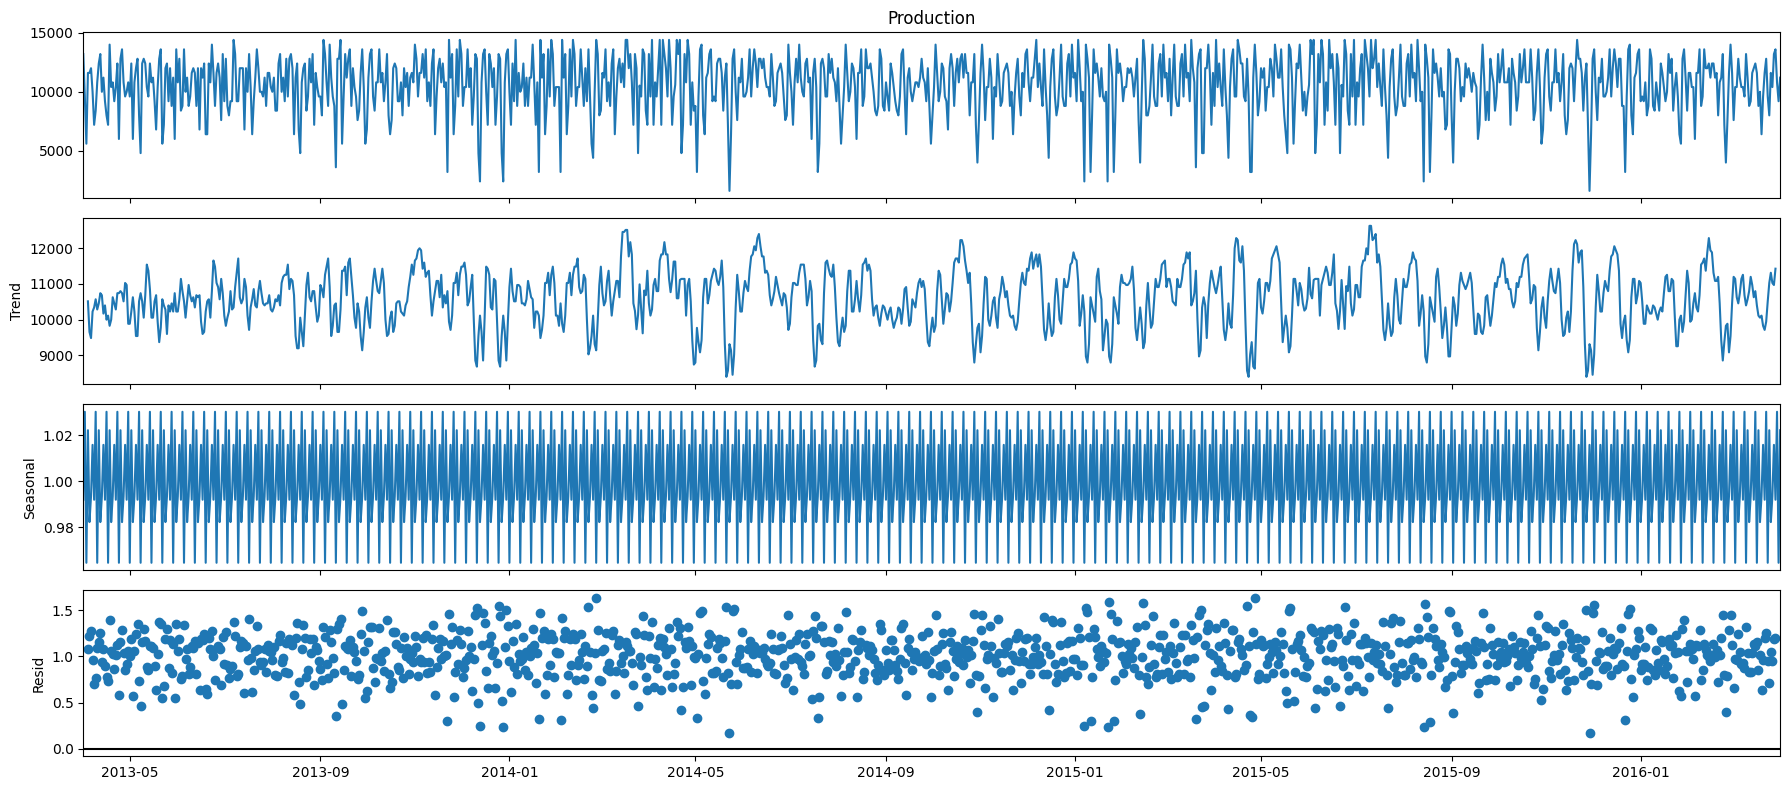

In [14]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = df.Production
result = seasonal_decompose(series, model='multiplicative')
result.plot();

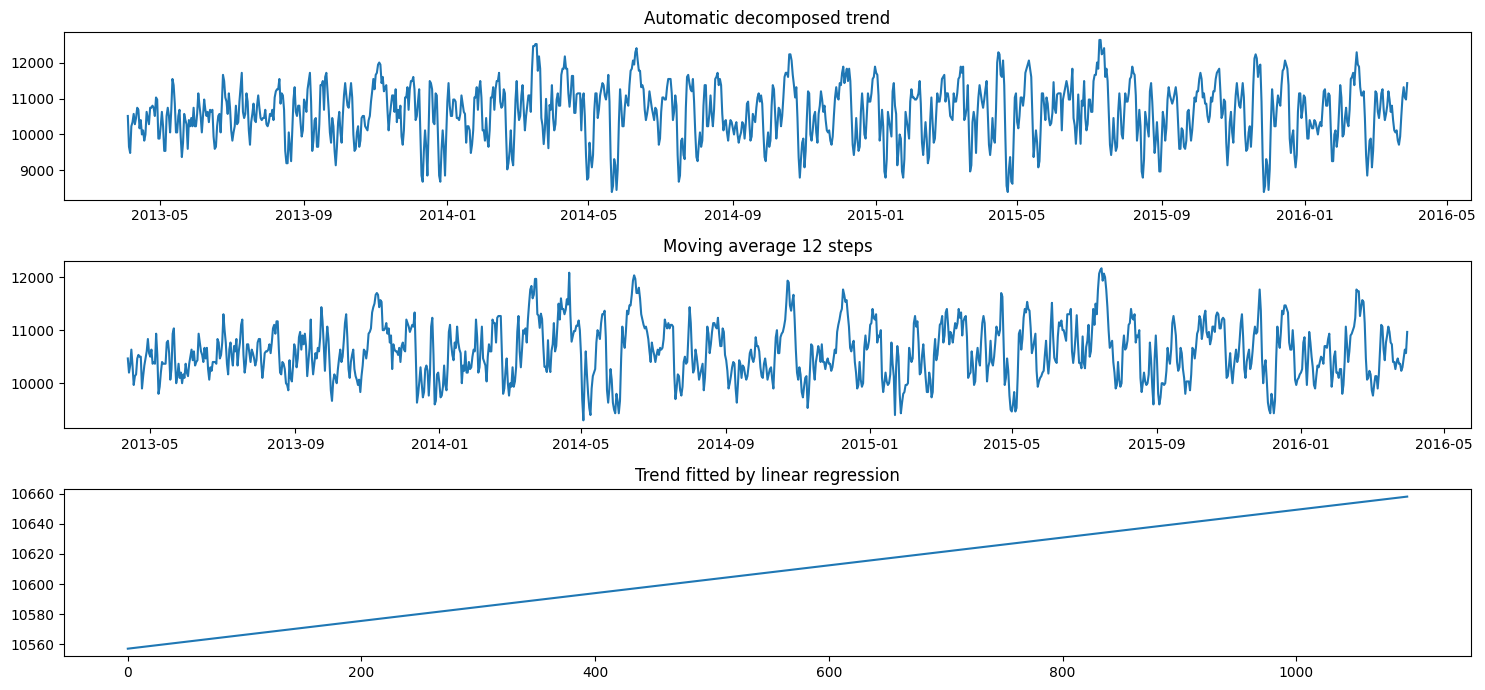

In [15]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = df.Production.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")

X = [i for i in range(0, len(df.Production))]
X = np.reshape(X, (len(X), 1))
y = df.Production.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

### Seasonality

<Figure size 4000x1600 with 0 Axes>

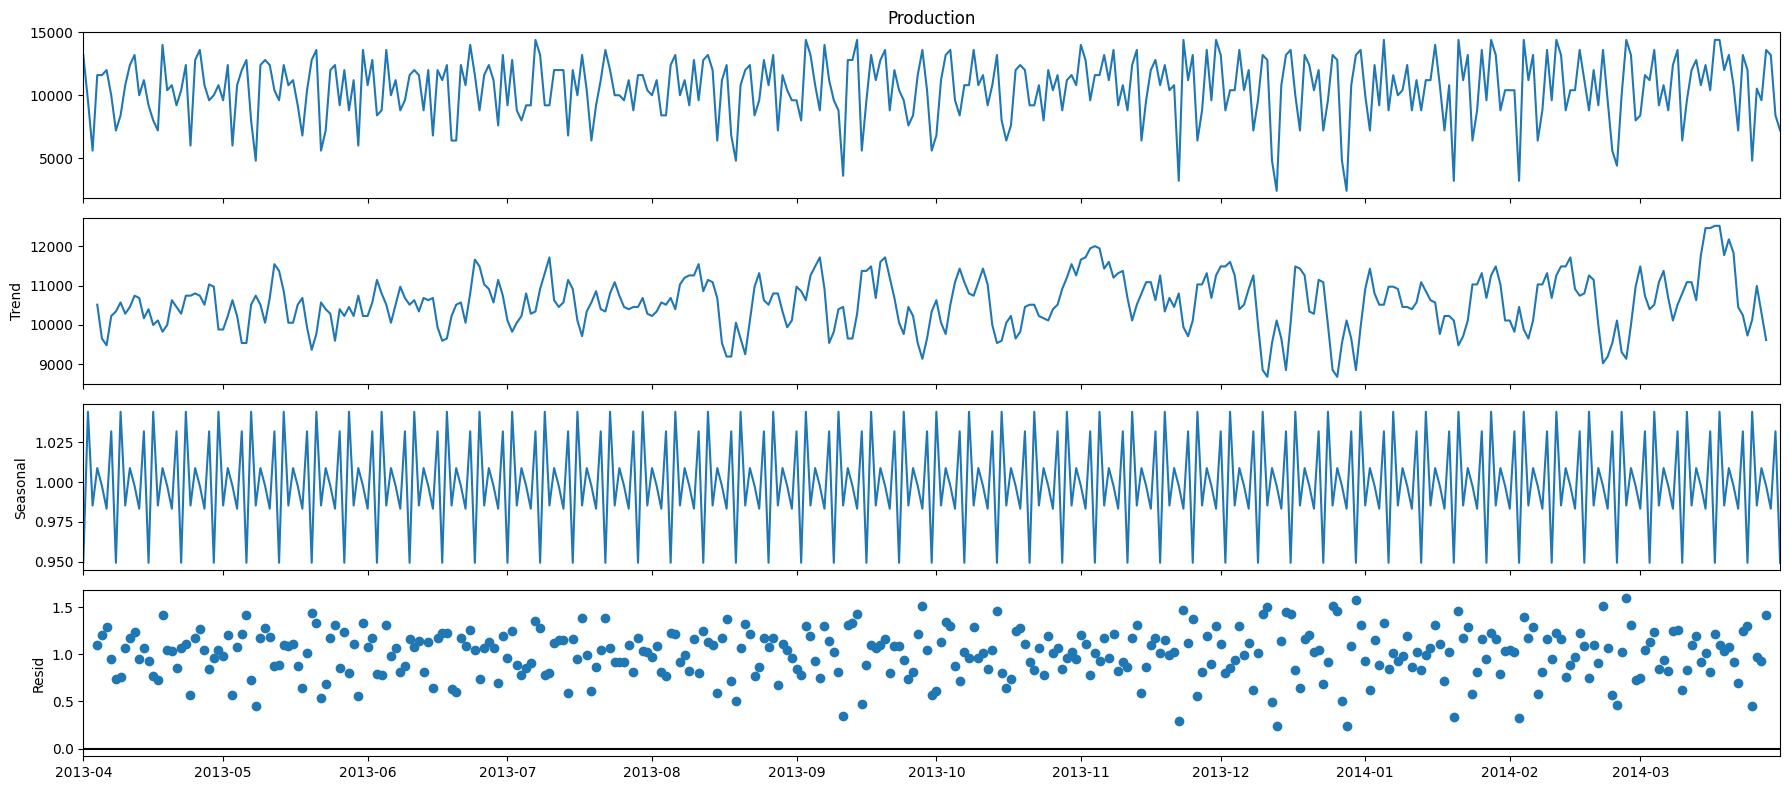

In [16]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = df[df['Financial_Year'] == '2013_2014']['Production']
result = seasonal_decompose(series, model='multiplicative')
result.plot();

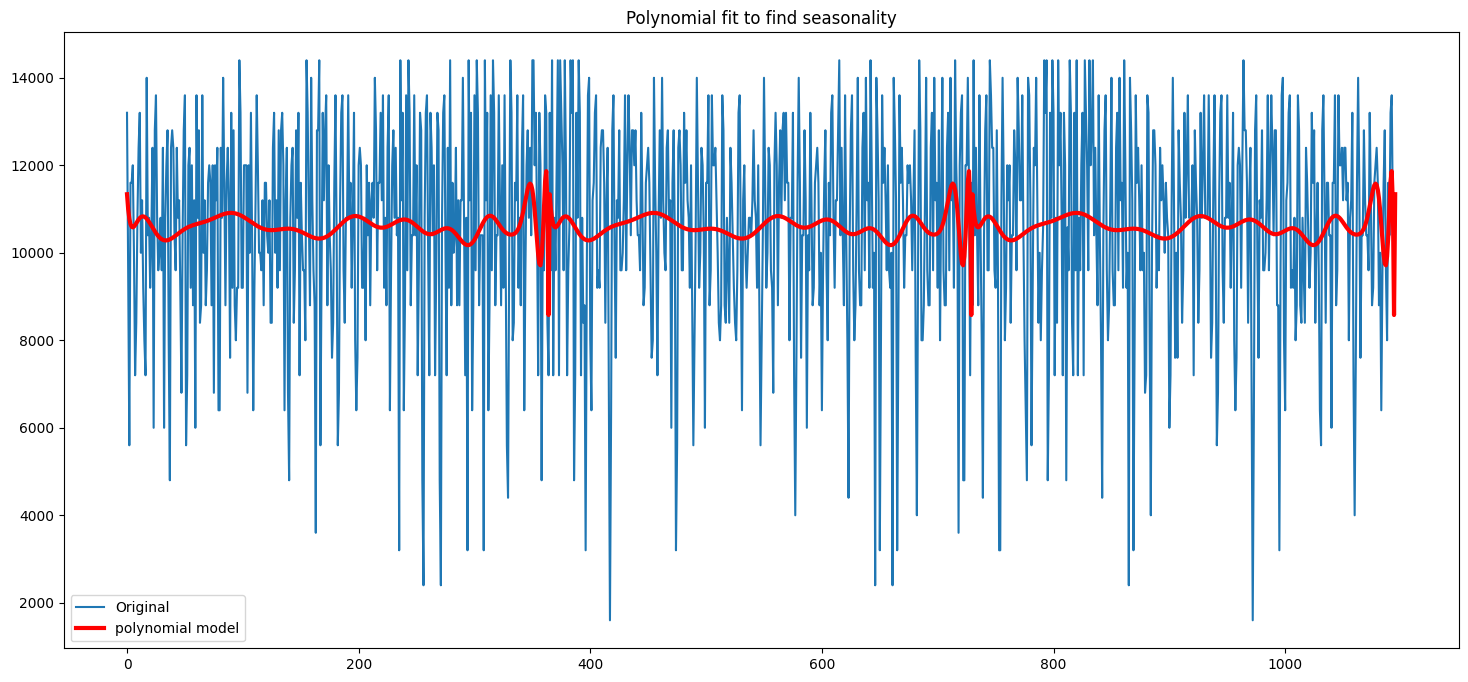

In [17]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = df.Production.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

### Noise or Random component

Text(0.5, 1.0, 'Mean over time')

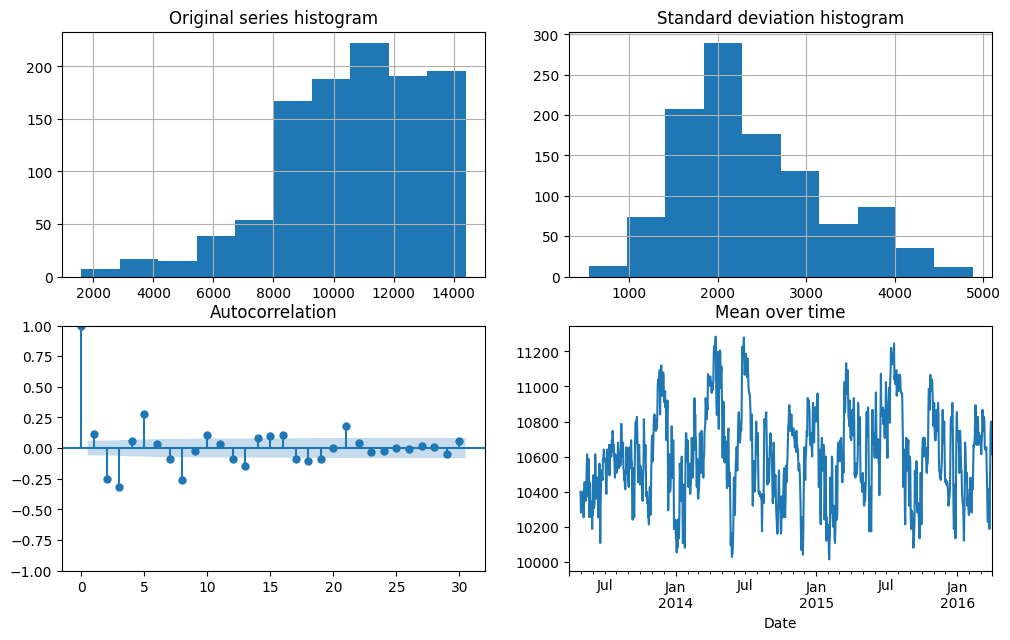

In [18]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.Production.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = df.Production.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = df.Production.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

### Stationarity

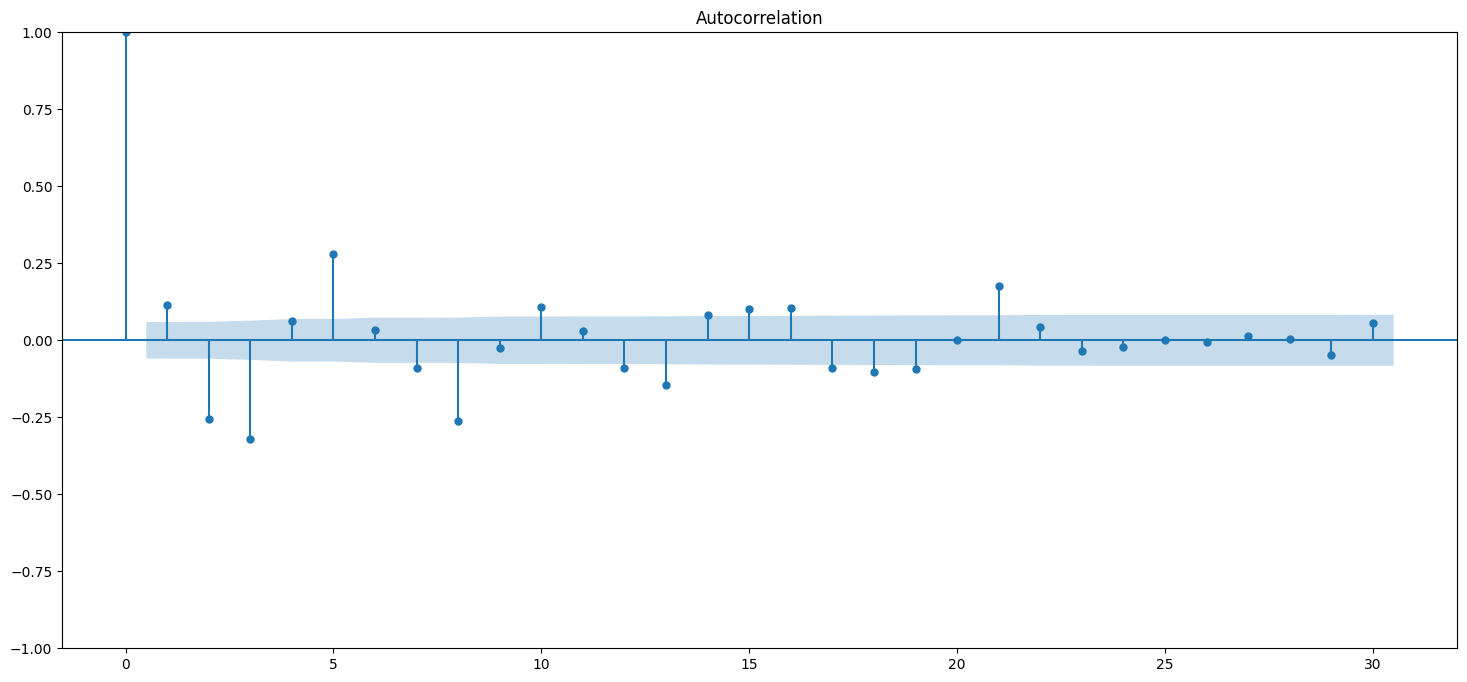

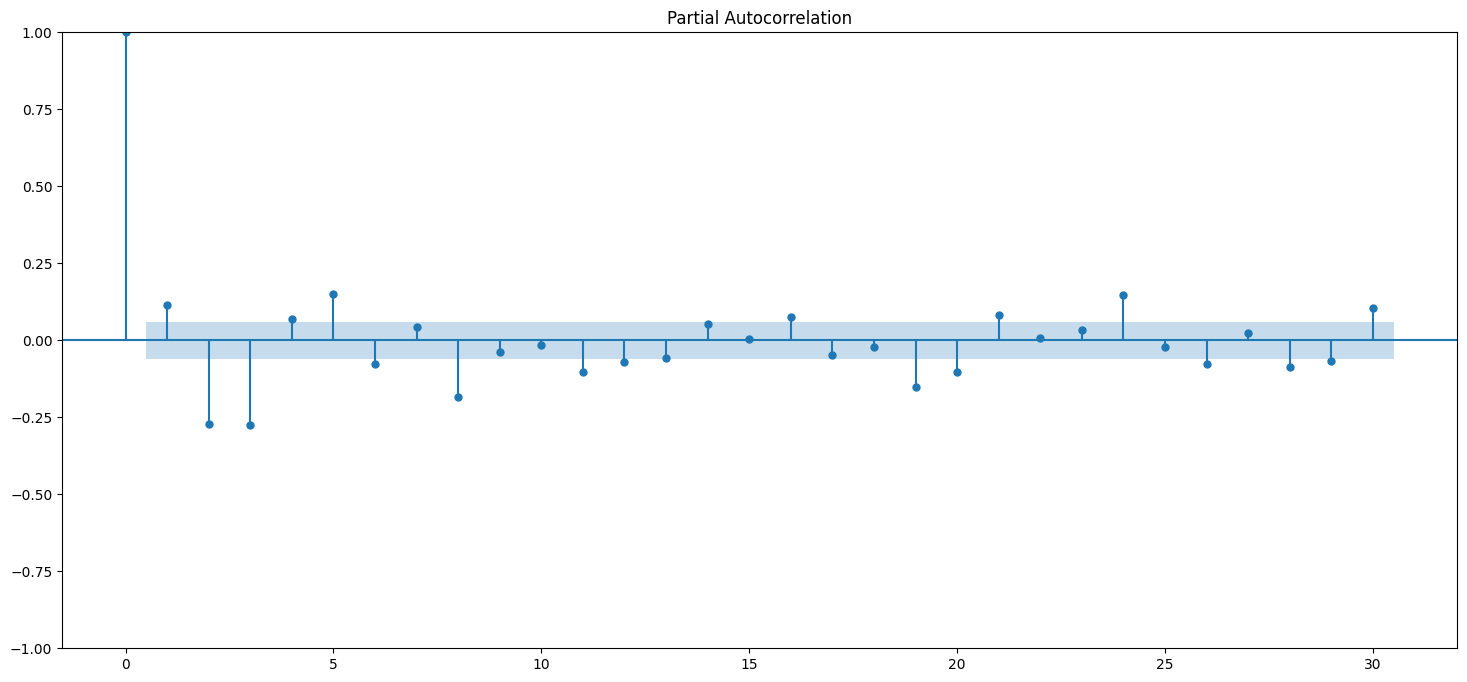

In [19]:
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

### Rolling means and standard deviation of our series

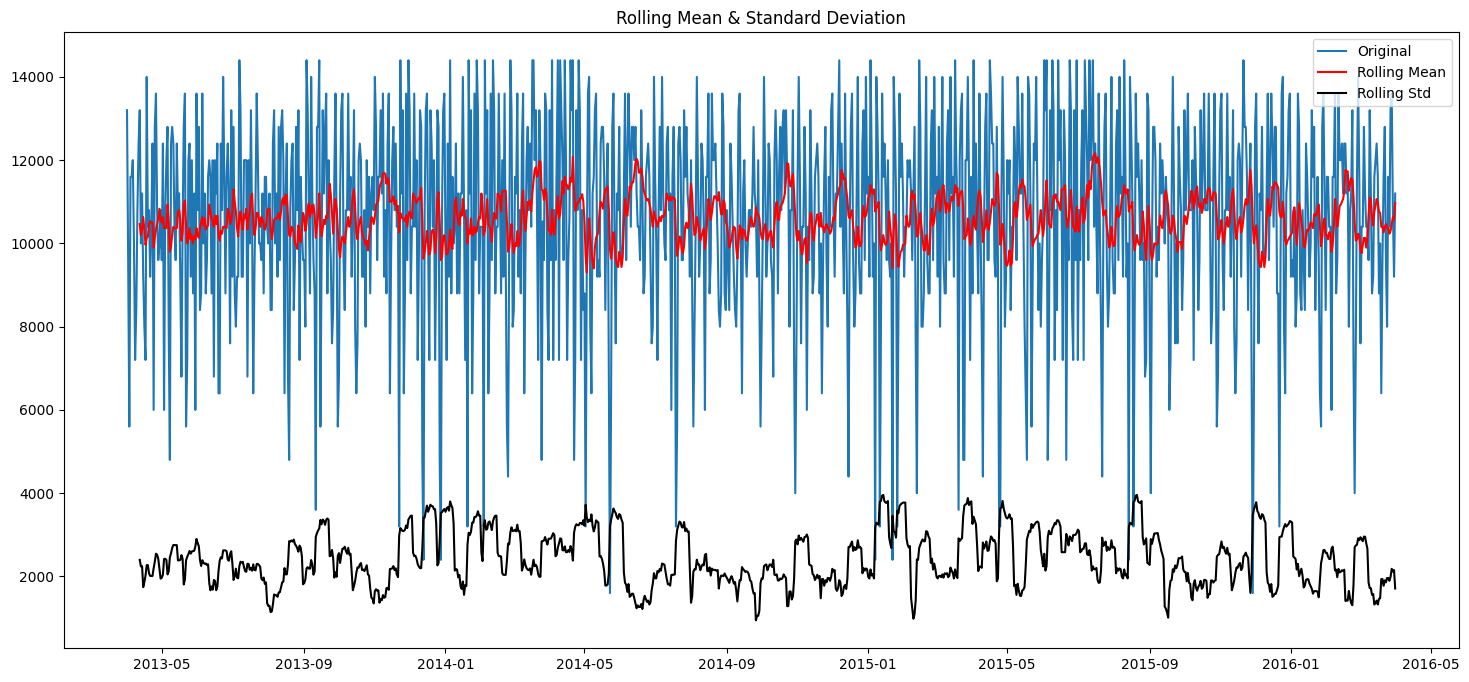

In [20]:
# Determing rolling statistics
rolmean = df.Production.rolling(window=12).mean()
rolstd = df.Production.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(df.Production, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Augmented Dickey-Fuller test

In [21]:
X = df.Production.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.622251
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


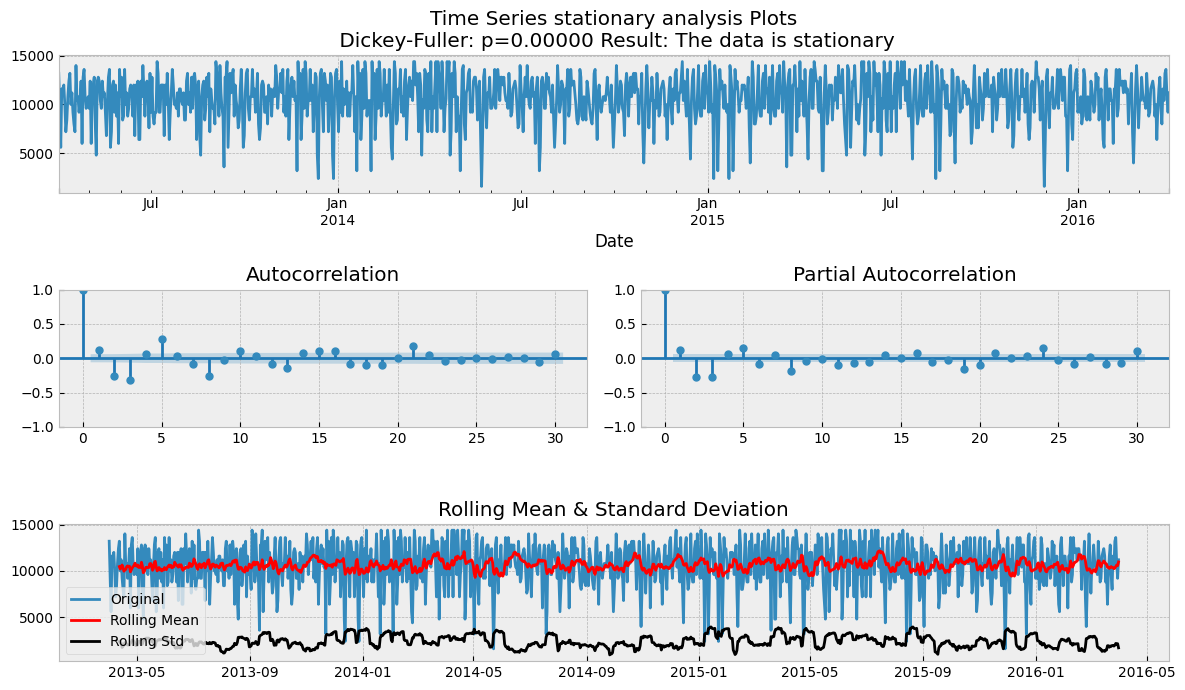

In [22]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "The data is stationary" if p_value <= 0.05 else "The data is not stationary"
        ts_ax.set_title(
            'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = y.rolling(window=12).mean()
        rolstd = y.rolling(window=12).std()

        # Plot rolling statistics:
        orig = plt.plot(y, label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')

tsplot(df.Production, lags=30)

### Differentiation & Lags

In [23]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

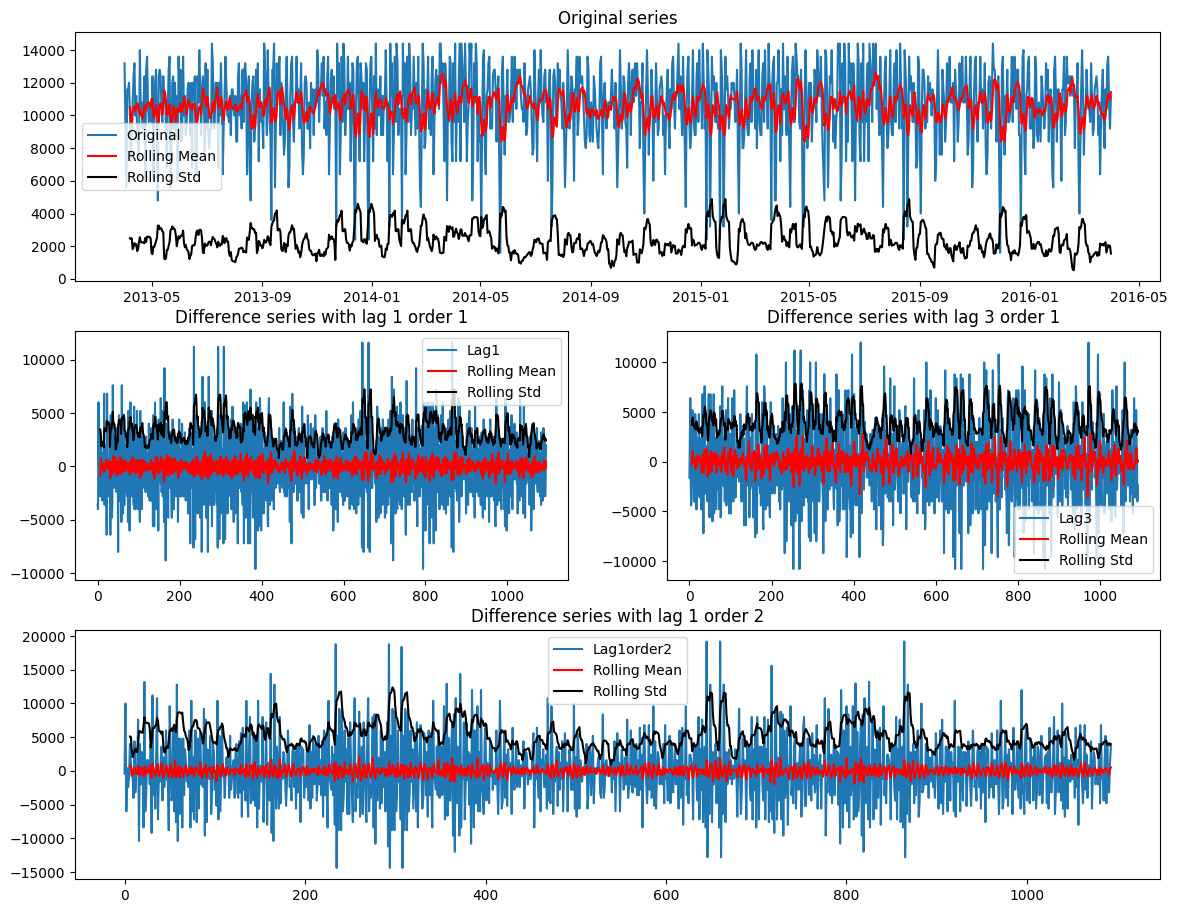

In [24]:
lag1series = pd.Series(difference(df.Production, interval=1, order=1))
lag3series = pd.Series(difference(df.Production, interval=3, order=1))
lag1order2series = pd.Series(difference(df.Production, interval=1, order=2))

fig = plt.figure(figsize=(14, 11))
layout = (3, 2)
original = plt.subplot2grid(layout, (0, 0), colspan=2)
lag1 = plt.subplot2grid(layout, (1, 0))
lag3 = plt.subplot2grid(layout, (1, 1))
lag1order2 = plt.subplot2grid(layout, (2, 0), colspan=2)

original.set_title('Original series')
original.plot(df.Production, label='Original')
original.plot(df.Production.rolling(
    7).mean(), color='red', label='Rolling Mean')
original.plot(df.Production.rolling(7).std(),
              color='black', label='Rolling Std')
original.legend(loc='best')

lag1.set_title('Difference series with lag 1 order 1')
lag1.plot(lag1series, label="Lag1")
lag1.plot(lag1series.rolling(7).mean(), color='red', label='Rolling Mean')
lag1.plot(lag1series.rolling(7).std(), color='black', label='Rolling Std')
lag1.legend(loc='best')

lag3.set_title('Difference series with lag 3 order 1')
lag3.plot(lag3series, label="Lag3")
lag3.plot(lag3series.rolling(7).mean(), color='red', label='Rolling Mean')
lag3.plot(lag3series.rolling(7).std(), color='black', label='Rolling Std')
lag3.legend(loc='best')

lag1order2.set_title('Difference series with lag 1 order 2')
lag1order2.plot(lag1order2series, label="Lag1order2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color='red', label='Rolling Mean')
lag1order2.plot(lag1order2series.rolling(7).std(),
                color='black', label='Rolling Std')
lag1order2.legend(loc='best')

### Log transformation

Text(0.5, 1.0, 'Log scale transformation into original series')

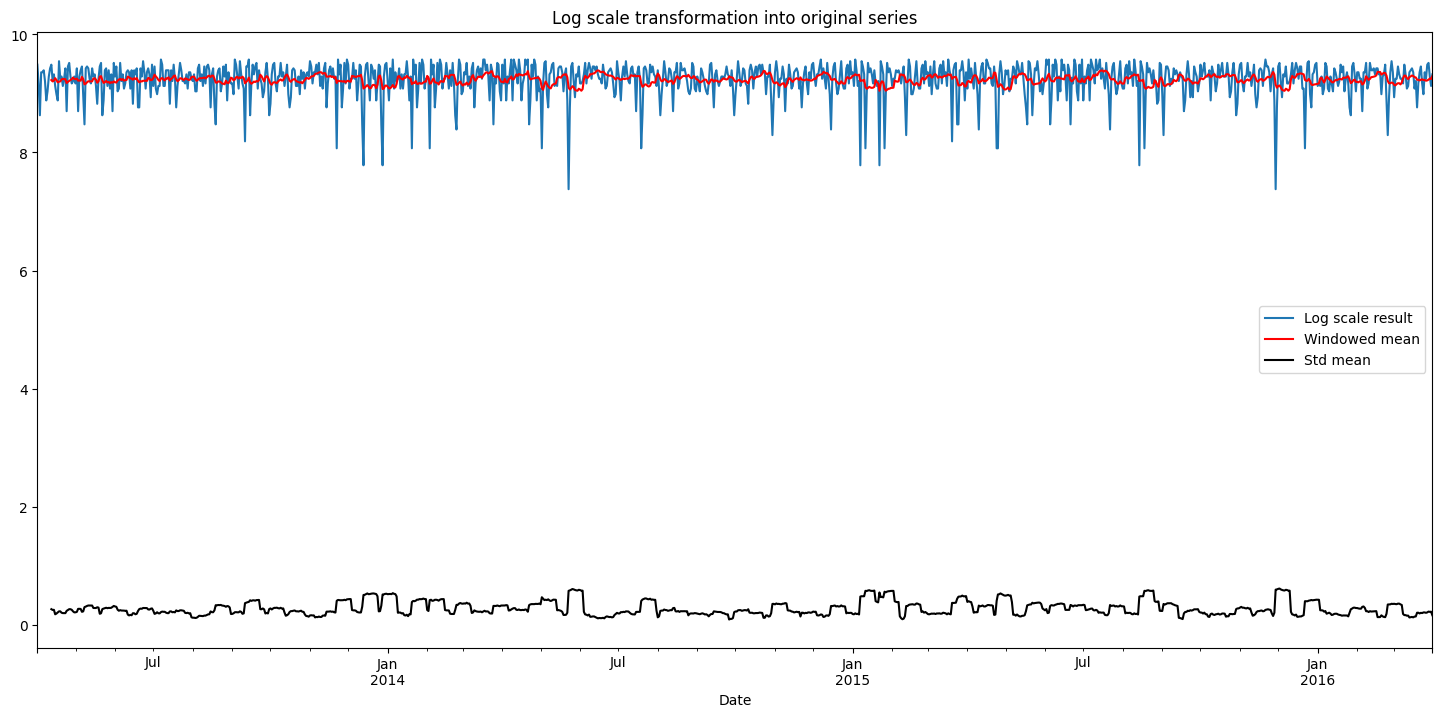

In [25]:
ts_log = np.log(df.Production)
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Log scale transformation into original series')

### Smoothing

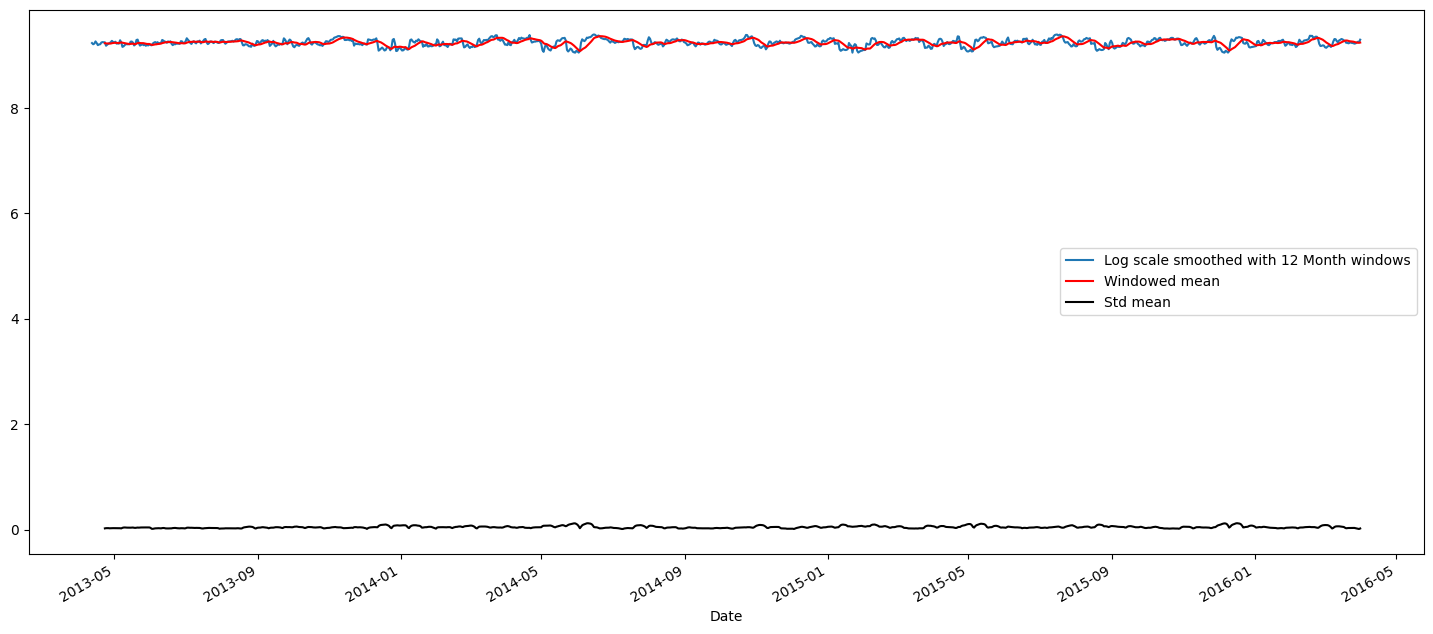

In [26]:
avg = pd.Series(ts_log).rolling(12).mean()
plt.plot(avg, label='Log scale smoothed with 12 Month windows')
avg.rolling(window=12).mean().plot(color='red', label='Windowed mean')
avg.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()